## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os
# os.remove('GSS.xlsx')
# upload=files.upload()

In [ ]:
gss=pd.read_excel('GSS.xlsx')
gss=gss.drop(columns='ballot')
gss.shape

(72390, 11)

In [ ]:
###Take out all non-answers and convert any numerical answers from strings to integers.
gss['marital']=gss['marital'].replace(['Did Not Answer','.d:  Do not Know/Cannot Choose','.i:  Inapplicable','.n:  No answer','.s:  Skipped on Web'],np.nan)

gss['wrkstat']=gss['wrkstat'].replace(['Did Not Answer','.d:  Do not Know/Cannot Choose','.i:  Inapplicable','.n:  No answer','.s:  Skipped on Web'],np.nan)

gss['age']=gss['age'].replace(['Did Not Answer','.i:  Inapplicable','.d:  Do not Know/Cannot Choose','.n:  No answer','.s:  Skipped on Web'],np.nan)
gss['age']=pd.to_numeric(gss['age'],errors='coerce')

gss['degree']=gss['degree'].replace(['Did Not Answer','.d:  Do not Know/Cannot Choose','.i:  Inapplicable','.n:  No answer','.s:  Skipped on Web'],np.nan)

gss['sex']=gss['sex'].replace(['.d:  Do not Know/Cannot Choose','.i:  Inapplicable','Did Not Answer','.n:  No answer','.s:  Skipped on Web'],np.nan)

gss['race']=gss['race'].replace(['Did Not Answer','.d:  Do not Know/Cannot Choose','.i:  Inapplicable','.n:  No answer','.s:  Skipped on Web'],np.nan)

gss['res16']=gss['res16'].replace(['Did Not Answer','.d:  Do not Know/Cannot Choose','.i:  Inapplicable','.n:  No answer','.s:  Skipped on Web'],np.nan)

gss['family16']=gss['family16'].replace(['Did Not Answer','.d:  Do not Know/Cannot Choose','.i:  Inapplicable','.n:  No answer','.s:  Skipped on Web'],np.nan)

gss=gss.dropna()
gss.shape

(69274, 10)

<ipython-input-70-0631f241b0dd>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


,age
count,69274.000000
mean,46.300214
std,17.371721
min,18.000000
25%,32.000000
50%,44.000000
75%,60.000000
max,88.000000


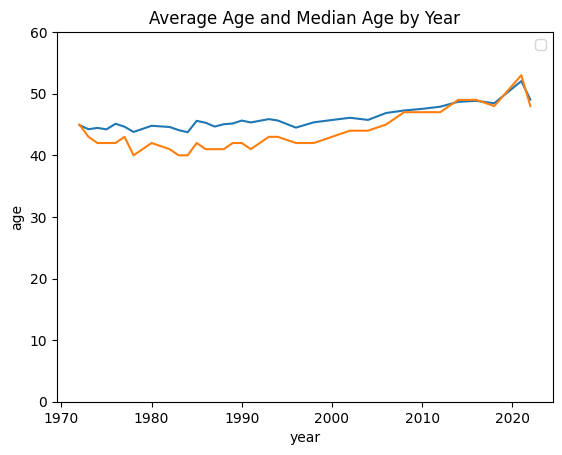

In [ ]:
##What's the average age of people willing to take this survey?

average_age=pd.DataFrame(gss.groupby('year')['age'].mean())
average_age['median age']=gss.groupby('year')['age'].median()
sns.lineplot(average_age,x='year',y='age')
sns.lineplot(average_age,x='year',y='median age')
plt.title('Average Age and Median Age by Year')
plt.legend()
plt.ylim(0,60)

gss['age'].describe()

<Axes: title={'center': 'Family Status v. Higher Education'}, xlabel='Family Status', ylabel='counts'>

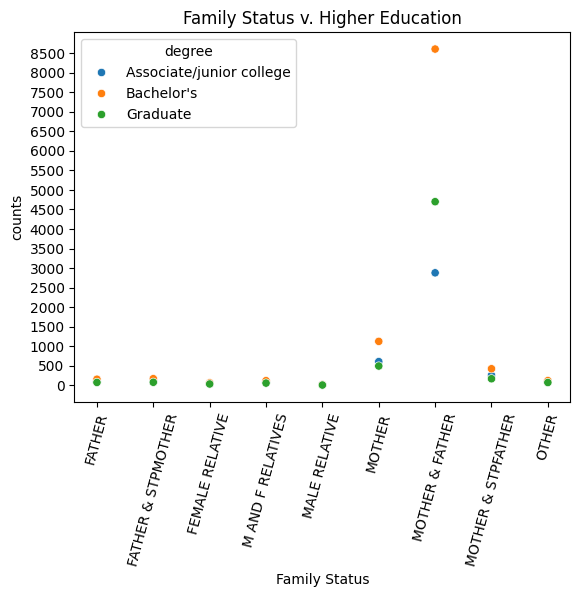

In [121]:
##Analyzing family status v. highest education completed

gss['family16'].describe()

family_degree=gss[(gss['degree'].isin(['Associate/junior college',"Bachelor's","Graduate"]))]
family_degree=pd.crosstab(family_degree['family16'],family_degree['degree'])
family_degree=family_degree.reset_index().melt(id_vars='family16',var_name='degree',value_name='counts')
plt.xlabel('Family Status')
plt.title('Family Status v. Higher Education')
plt.yticks(range(0,8501,500))
plt.xticks(rotation=75)
sns.scatterplot(family_degree,x='family16',y='counts',hue='degree')